<a href="https://colab.research.google.com/github/sri-soumya/UCS654-assignment-5/blob/main/102017134_assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages('kernlab')
install.packages('readxl')
install.packages('caTools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [4]:
library(readxl)
library(kernlab)
library(dplyr)
library(caTools)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
df=read_excel('ds.xlsx')
df

Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER
30477,670.033,211.0502,184.0391,1.146768,0.4894779,30970,196.9886,0.7624015,0.9840814,0.8530799,0.9333736,0.006924899,0.003242016,0.8711862,0.9990487,SEKER
30519,629.727,212.9968,182.7372,1.165591,0.5137596,30847,197.1243,0.7706818,0.9893669,0.9671092,0.9254804,0.006979152,0.003158285,0.8565140,0.9983446,SEKER
30685,635.681,213.5341,183.1571,1.165852,0.5140809,31044,197.6597,0.7715615,0.9884358,0.9542398,0.9256585,0.006958910,0.003151550,0.8568437,0.9989530,SEKER


In [6]:
unique(df['Class'])
v=c()

for (i in 1:nrow(df)){
  if(df[i,17]=='SEKER'){
    v=c(v,0)
  }
  else if(df[i,17]=='BARBUNYA'){
    v=c(v,1)
  }
  else if(df[i,17]=='BOMBAY'){
    v=c(v,2)
  }
  else if(df[i,17]=='CALI'){
    v=c(v,3)
  }
  else if(df[i,17]=='HOROZ'){
    v=c(v,4)
  }
  else if(df[i,17]=='SIRA'){
    v=c(v,5)
  }
  else if(df[i,17]=='DERMASON'){
    v=c(v,6)
  }

}

df['Class']=v

unique(df['Class'])

Class
<chr>
SEKER
BARBUNYA
BOMBAY
CALI
HOROZ
SIRA
DERMASON


Class
<dbl>
0
1
2
3
4
5
6


In [7]:
fitnessFunction=function(k,n,e,data_train,data_test){

  xx=c(data_train[,17])

  model=ksvm(as.matrix(data_train[,1:16]),xx,kernel=k,nu=n,epsilon=e,kpar=list())
  pred=round(predict(model,data_test[,1:16]))
  acc=round(mean(data_test[,17]==pred)*100,2)
  return (acc)
}

In [9]:
sample_res=function(dfs)
{
  split_data=sample.split(dfs$Area,SplitRatio=0.7)
  data_train=subset(dfs,split_data==T)
  data_test=subset(dfs,split_data==F)

  bk=""
  ba=0
  bn=0
  be=0
  kernels=c('rbfdot', 'polydot', 'vanilladot', 'tanhdot', 'laplacedot', 'anovadot')
  for(i in 1:100){
    k=sample(kernels,1)
    n=runif(1)
    e=runif(1)
    acc=fitnessFunction(k,n,e,data_train,data_test)
    
    if(acc>ba){
      bk=k
      bn=n
      be=e
      ba=acc
    }

    return (data.frame(acc=c(ba),kernel=c(bk),nu=c(bn),epsilon=c(be)))
  }
}

In [18]:
dff=data.frame(acc=c(),kernel=c(),nu=c(),epsilon=c())
bacc=0
samp=data.frame()
for (sam in 1:10){
  df1=sample_n(df,1361)
  x=sample_res(df1)
  dff=rbind(dff,x)
  if(x$acc>bacc){
    bacc=x$acc
    samp=df1
  }
}
print(dff)
print(bacc)
print(samp)

     acc     kernel         nu   epsilon
1  26.41 vanilladot 0.11976909 0.9160424
2  18.09 laplacedot 0.22040970 0.6391818
3  59.90     rbfdot 0.24873112 0.1826977
4  12.47     rbfdot 0.39884824 0.8971349
5  34.96    polydot 0.39162650 0.7220058
6  43.77    polydot 0.05063090 0.3082899
7  20.54 laplacedot 0.44611914 0.5701188
8   0.73    tanhdot 0.69499646 0.7706837
9   0.49    tanhdot 0.34433645 0.1141398
10 65.77     rbfdot 0.05733891 0.1112479
[1] 65.77
# A tibble: 1,361 × 17
     Area Perimeter MajorAxisLength MinorAxisLength AspectRation Eccentricity
    <dbl>     <dbl>           <dbl>           <dbl>        <dbl>        <dbl>
 1  34283      692.            256.            171.         1.50        0.745
 2  66990     1004.            375.            230.         1.63        0.789
 3 156974     1474.            551.            367.         1.50        0.746
 4  38945      718.            242.            205.         1.18        0.529
 5  35873      690.            256.            1

In [19]:
split_data=sample.split(samp$Area,SplitRatio=0.7)
data_train=subset(samp,split_data==T)
data_test=subset(samp,split_data==F)

bk=""
ba=0
bn=0
be=0
af=c()
kernels=c('rbfdot', 'polydot', 'vanilladot', 'tanhdot', 'laplacedot', 'anovadot')
for(i in 1:100){
  k=sample(kernels,1)
  n=runif(1)
  e=runif(1)
  acc=fitnessFunction(k,n,e,data_train,data_test)
  if(acc>ba){
    ba=acc
  }

  af=c(af,ba)
}


Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


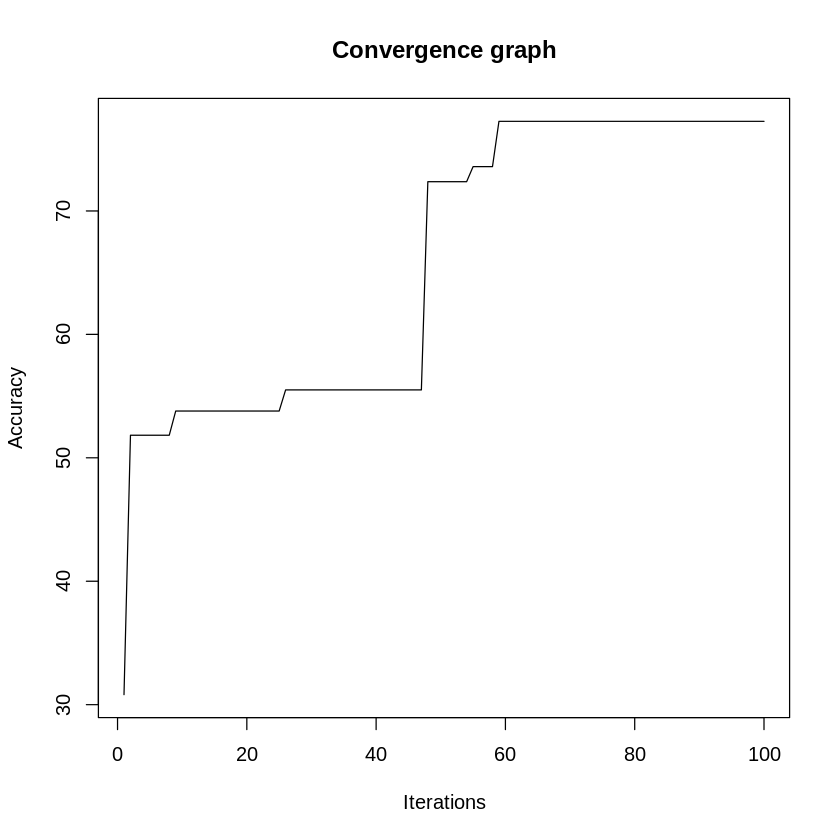

In [23]:
plot(1:100,(af),'line',xlab='Iterations',ylab='Accuracy',main='Convergence graph')
